# Rice Analysis Using Convolutional Neural Network Technique

The following code will analyze deep learning using CNN techniques in predicting rice plant diseases namely Bercak Coklat, Blast, Hawar daun bakteri, and Tungro.

### Connect to Drive

In [ ]:
# This is used to connect colab with google drive.

gcolab = 1
if gcolab:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Split the dataset into different subsets/subfolders. This is useful in tasks such as splitting a dataset into training, validation, and testing sets.

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Library

Import some libraries to support the model running

In [ ]:
import os
import shutil
import splitfolders
import numpy as np
import seaborn as sns
import time
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import load_model
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

### Data Preparation

In this case, we used 25% of the data from all images with a total of 1487 images collected. After that, the data is divided into 0.70 train data and 0.30 test data. Data source from [Kaggle](https://www.kaggle.com/datasets/shareef0612/riceleaf-dataset).



In [ ]:
# Create a directory to contain the entire dataset

os.mkdir("./Data Penyakit Padi/")
splitfolders.ratio("/content/drive/MyDrive/Project ML/Penyakit Padi", output="./Data Penyakit Padi", seed=2023, ratio=(.25, .75), group_prefix=None)

Copying files: 5950 files [00:30, 192.89 files/s]


In [ ]:
output_folder = "./Data Penyakit Padi"

# Calculating the amount of training data
train_folder = os.path.join(output_folder, "train")
num_train_samples = sum(len(files) for _, _, files in os.walk(train_folder))

# Counting the number of validation data
val_folder = os.path.join(output_folder, "val")
num_val_samples = sum(len(files) for _, _, files in os.walk(val_folder))

# Display the number of training data and validation data
print("The amount of training data:", num_train_samples)
print("The amount of validation data:", num_val_samples)


The amount of training data: 1487
The amount of validation data: 4463


In [ ]:
# Create a directory of the previous train data as the data to be analyzed

splitfolders.ratio("./Data Penyakit Padi/train", output="./Data Penyakit Padi Fix", seed=2023, ratio=(.70, .30), group_prefix=None)

Copying files: 1487 files [00:00, 2726.52 files/s]


In [ ]:
# To remove a directory

# folder_path = "/content/Data Penyakit Padi Fix"
# shutil.rmtree(folder_path)

In [ ]:
bercakCoklat_train_dir = "./Data Penyakit Padi Fix/train/Bercak Coklat"
Blast_train_dir = "./Data Penyakit Padi Fix/train/Blast"
hawardaunbakteri_train_dir = "./Data Penyakit Padi Fix/train/Hawar daun bakteri"
tungro_train_dir = "./Data Penyakit Padi Fix/train/Tungro"

bercakCoklat_val_dir = "./Data Penyakit Padi Fix/val/Bercak Coklat"
Blast_val_dir = "./Data Penyakit Padi Fix/val/Blast"
hawardaunbakteri_val_dir = "./Data Penyakit Padi Fix/val/Hawar daun bakteri"
tungro_val_dir = "./Data Penyakit Padi Fix/val/Tungro"

In [ ]:
print('total training bercak coklat images :', len(os.listdir(      bercakCoklat_train_dir) ))
print('total training Blast images :', len(os.listdir(      Blast_train_dir ) ))
print('total training hawar daun bakteri images :', len(os.listdir(      hawardaunbakteri_train_dir ) ))
print('total training tungro images :', len(os.listdir(      tungro_train_dir ) ))

total training bercak coklat images : 280
total training Blast images : 251
total training hawar daun bakteri images : 278
total training tungro images : 230


In [ ]:
print('total validation bercak coklat images :', len(os.listdir( bercakCoklat_val_dir ) ))
print('total validation Blast images :', len(os.listdir( Blast_val_dir ) ))
print('total validation hawar daun bakteri images :', len(os.listdir( hawardaunbakteri_val_dir ) ))
print('total validation tungro images :', len(os.listdir( tungro_val_dir ) ))

total validation bercak coklat images : 120
total validation Blast images : 109
total validation hawar daun bakteri images : 120
total validation tungro images : 99


Displays 4 random images of each rice disease

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Sample Bercak Coklat image:


<Figure size 640x480 with 0 Axes>

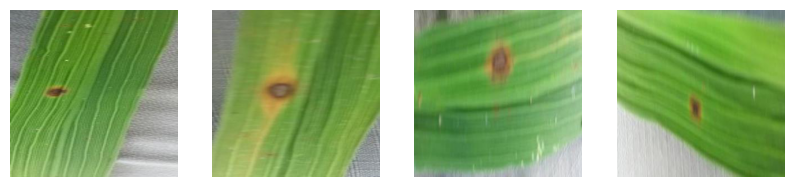

Sample Blast image:


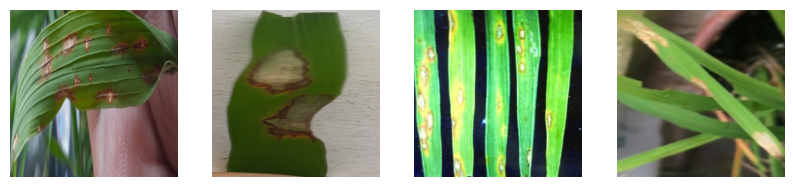

Sample Hawar daun Bakteri image:


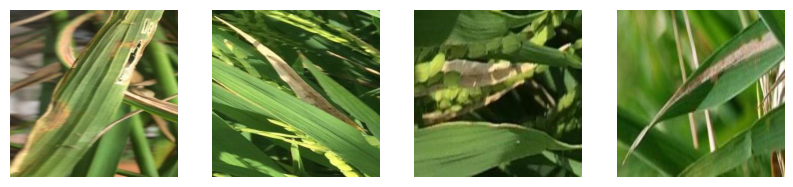

Sample tungro image:


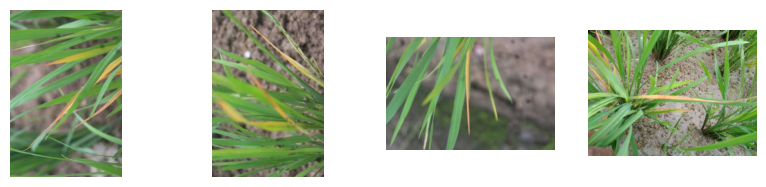

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
pic_index += 4

# Bercak Coklat
print("Sample Bercak Coklat image:")
next_bercakcoklat_pic = [os.path.join(bercakCoklat_train_dir, fname) 
                         for fname in os.listdir(bercakCoklat_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_bercakcoklat_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img) 

plt.show()

# Blast
print("Sample Blast image:")
next_blast_pic = [os.path.join(Blast_train_dir, fname) 
                  for fname in os.listdir(Blast_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_blast_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img) 

plt.show()

# Hawar daun Bakteri
print("Sample Hawar daun Bakteri image:")
next_hawar_pic = [os.path.join(hawardaunbakteri_train_dir, fname) 
                  for fname in os.listdir(hawardaunbakteri_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_hawar_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Tungro
print("Sample tungro image:")
next_tungro_pic = [os.path.join(tungro_train_dir, fname) 
                  for fname in os.listdir(tungro_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_tungro_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img) 

plt.show()



Implemented data augmentation using ImageDataGenerator class to prepare train and validation data containing 4 diseases to be analyzed.

In [ ]:
Training_dir = './Data Penyakit Padi Fix/train'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(Training_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(150, 150)) 
Validation_dir = './Data Penyakit Padi Fix/val'
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(Validation_dir,
                                                              batch_size=16,
                                                              class_mode  = 'categorical',
                                                              target_size = (150, 150))

Found 1039 images belonging to 4 classes.
Found 448 images belonging to 4 classes.


### Data Modeling

In [ ]:
pre_trained_model_4desease = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model_4desease.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    # Only 1 output neuron. It will contain a value from 0-2 where 
    tf.keras.layers.Dense(4, activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_94 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_95 (Bat  (None, 72, 72, 64)       256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])



### Training Model

We will train the model for 75 epochs

In [ ]:
sourcedata = "/content/drive/MyDrive/Project ML/checkpoint"

if not os.path.exists(sourcedata):  # Periksa apakah direktori sudah ada sebelum membuatnya
    os.mkdir(sourcedata)

checkpoint = ModelCheckpoint(sourcedata, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
start_time = time.time()

callbacks_list = [checkpoint]

history = model.fit(train_generator, validation_data=validation_generator,steps_per_epoch = 20, epochs=60, callbacks=[callbacks_list])

duration = time.time() - start_time
minutes = duration // 60
seconds = duration % 60
print("Waktu running: {:.0f}:{:.0f}".format(minutes, seconds))

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 2.1454 - accuracy: 0.5750
Epoch 1: val_accuracy improved from -inf to 0.32812, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 47s 2s/step - loss: 2.1454 - accuracy: 0.5750 - val_loss: 1.4160 - val_accuracy: 0.3281
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 1.3052 - accuracy: 0.7125
Epoch 2: val_accuracy did not improve from 0.32812
20/20 [==============================] - 36s 2s/step - loss: 1.3052 - accuracy: 0.7125 - val_loss: 1.6465 - val_accuracy: 0.2679
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 1.2472 - accuracy: 0.6812
Epoch 3: val_accuracy did not improve from 0.32812
20/20 [==============================] - 34s 2s/step - loss: 1.2472 - accuracy: 0.6812 - val_loss: 2.6762 - val_accuracy: 0.2679
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.7574 - accuracy: 0.7524
Epoch 4: val_accuracy did not improve from 0.32812
20/20 [==============================] - 32s 2s/step - loss: 0.7574 - accuracy: 0.7524 - val_loss: 3.0180 - val_accuracy: 0.2679
Epoch 5/50
20/20 [==============================]

20/20 [==============================] - 36s 2s/step - loss: 0.5067 - accuracy: 0.8031 - val_loss: 3.0864 - val_accuracy: 0.3348
Epoch 16/50
20/20 [==============================] - ETA: 0s - loss: 0.4304 - accuracy: 0.8438
Epoch 16: val_accuracy did not improve from 0.33482
20/20 [==============================] - 30s 2s/step - loss: 0.4304 - accuracy: 0.8438 - val_loss: 3.3832 - val_accuracy: 0.3170
Epoch 17/50
20/20 [==============================] - ETA: 0s - loss: 0.4103 - accuracy: 0.8438
Epoch 17: val_accuracy improved from 0.33482 to 0.42188, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 37s 2s/step - loss: 0.4103 - accuracy: 0.8438 - val_loss: 3.1132 - val_accuracy: 0.4219
Epoch 18/50
20/20 [==============================] - ETA: 0s - loss: 0.3866 - accuracy: 0.8527
Epoch 18: val_accuracy improved from 0.42188 to 0.49107, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 34s 2s/step - loss: 0.3866 - accuracy: 0.8527 - val_loss: 2.3116 - val_accuracy: 0.4911
Epoch 19/50
20/20 [==============================] - ETA: 0s - loss: 0.3874 - accuracy: 0.8750
Epoch 19: val_accuracy improved from 0.49107 to 0.51786, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 35s 2s/step - loss: 0.3874 - accuracy: 0.8750 - val_loss: 2.0383 - val_accuracy: 0.5179
Epoch 20/50
20/20 [==============================] - ETA: 0s - loss: 0.3192 - accuracy: 0.8903
Epoch 20: val_accuracy improved from 0.51786 to 0.64732, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 34s 2s/step - loss: 0.3192 - accuracy: 0.8903 - val_loss: 1.4503 - val_accuracy: 0.6473
Epoch 21/50
20/20 [==============================] - ETA: 0s - loss: 0.2820 - accuracy: 0.8969
Epoch 21: val_accuracy did not improve from 0.64732
20/20 [==============================] - 34s 2s/step - loss: 0.2820 - accuracy: 0.8969 - val_loss: 1.3621 - val_accuracy: 0.6138
Epoch 22/50
20/20 [==============================] - ETA: 0s - loss: 0.3582 - accuracy: 0.8656
Epoch 22: val_accuracy improved from 0.64732 to 0.68304, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 34s 2s/step - loss: 0.3582 - accuracy: 0.8656 - val_loss: 1.0613 - val_accuracy: 0.6830
Epoch 23/50
20/20 [==============================] - ETA: 0s - loss: 0.3085 - accuracy: 0.8997
Epoch 23: val_accuracy improved from 0.68304 to 0.76116, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 37s 2s/step - loss: 0.3085 - accuracy: 0.8997 - val_loss: 0.8986 - val_accuracy: 0.7612
Epoch 24/50
20/20 [==============================] - ETA: 0s - loss: 0.4389 - accuracy: 0.8531
Epoch 24: val_accuracy did not improve from 0.76116
20/20 [==============================] - 31s 2s/step - loss: 0.4389 - accuracy: 0.8531 - val_loss: 1.1017 - val_accuracy: 0.6763
Epoch 25/50
20/20 [==============================] - ETA: 0s - loss: 0.3215 - accuracy: 0.8813
Epoch 25: val_accuracy improved from 0.76116 to 0.77455, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 36s 2s/step - loss: 0.3215 - accuracy: 0.8813 - val_loss: 0.7003 - val_accuracy: 0.7746
Epoch 26/50
20/20 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.8375
Epoch 26: val_accuracy did not improve from 0.77455
20/20 [==============================] - 34s 2s/step - loss: 0.4209 - accuracy: 0.8375 - val_loss: 0.7172 - val_accuracy: 0.7679
Epoch 27/50
20/20 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.9000
Epoch 27: val_accuracy improved from 0.77455 to 0.80804, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 37s 2s/step - loss: 0.2474 - accuracy: 0.9000 - val_loss: 0.6768 - val_accuracy: 0.8080
Epoch 28/50
20/20 [==============================] - ETA: 0s - loss: 0.2918 - accuracy: 0.8844
Epoch 28: val_accuracy improved from 0.80804 to 0.87054, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 34s 2s/step - loss: 0.2918 - accuracy: 0.8844 - val_loss: 0.4282 - val_accuracy: 0.8705
Epoch 29/50
20/20 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.9122
Epoch 29: val_accuracy improved from 0.87054 to 0.88170, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 36s 2s/step - loss: 0.2572 - accuracy: 0.9122 - val_loss: 0.3832 - val_accuracy: 0.8817
Epoch 30/50
20/20 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.9000
Epoch 30: val_accuracy improved from 0.88170 to 0.89732, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 36s 2s/step - loss: 0.2693 - accuracy: 0.9000 - val_loss: 0.3895 - val_accuracy: 0.8973
Epoch 31/50
20/20 [==============================] - ETA: 0s - loss: 0.3200 - accuracy: 0.8844
Epoch 31: val_accuracy did not improve from 0.89732
20/20 [==============================] - 31s 2s/step - loss: 0.3200 - accuracy: 0.8844 - val_loss: 0.4144 - val_accuracy: 0.8817
Epoch 32/50
20/20 [==============================] - ETA: 0s - loss: 0.3202 - accuracy: 0.8687
Epoch 32: val_accuracy did not improve from 0.89732
20/20 [==============================] - 34s 2s/step - loss: 0.3202 - accuracy: 0.8687 - val_loss: 0.3782 - val_accuracy: 0.8951
Epoch 33/50
20/20 [==============================] - ETA: 0s - loss: 0.4189 - accuracy: 0.8687
Epoch 33: val_accuracy improved from 0.89732 to 0.90848, saving model to /content/drive/MyDrive/Project ML/checkpoint


20/20 [==============================] - 36s 2s/step - loss: 0.4189 - accuracy: 0.8687 - val_loss: 0.3194 - val_accuracy: 0.9085
Epoch 34/50
20/20 [==============================] - ETA: 0s - loss: 0.2323 - accuracy: 0.9031
Epoch 34: val_accuracy did not improve from 0.90848
20/20 [==============================] - 31s 2s/step - loss: 0.2323 - accuracy: 0.9031 - val_loss: 0.4015 - val_accuracy: 0.8705
Epoch 35/50
20/20 [==============================] - ETA: 0s - loss: 0.3027 - accuracy: 0.9031
Epoch 35: val_accuracy did not improve from 0.90848
20/20 [==============================] - 30s 2s/step - loss: 0.3027 - accuracy: 0.9031 - val_loss: 0.4060 - val_accuracy: 0.8951
Epoch 36/50
20/20 [==============================] - ETA: 0s - loss: 0.3407 - accuracy: 0.8715
Epoch 36: val_accuracy did not improve from 0.90848
20/20 [==============================] - 34s 2s/step - loss: 0.3407 - accuracy: 0.8715 - val_loss: 0.4168 - val_accuracy: 0.8929
Epoch 37/50
20/20 [========================

20/20 [==============================] - 34s 2s/step - loss: 0.2564 - accuracy: 0.9031 - val_loss: 0.2262 - val_accuracy: 0.9241
Epoch 40/50
20/20 [==============================] - ETA: 0s - loss: 0.2837 - accuracy: 0.9185
Epoch 40: val_accuracy did not improve from 0.92411
20/20 [==============================] - 30s 2s/step - loss: 0.2837 - accuracy: 0.9185 - val_loss: 0.2969 - val_accuracy: 0.9241
Epoch 41/50
20/20 [==============================] - ETA: 0s - loss: 0.2406 - accuracy: 0.9062
Epoch 41: val_accuracy did not improve from 0.92411
20/20 [==============================] - 30s 2s/step - loss: 0.2406 - accuracy: 0.9062 - val_loss: 0.2699 - val_accuracy: 0.9152
Epoch 42/50
20/20 [==============================] - ETA: 0s - loss: 0.2525 - accuracy: 0.9062
Epoch 42: val_accuracy did not improve from 0.92411
20/20 [==============================] - 33s 2s/step - loss: 0.2525 - accuracy: 0.9062 - val_loss: 0.2800 - val_accuracy: 0.9152
Epoch 43/50
20/20 [========================

### Plot accuracy and loss

Here, we are going to evaluate the results with plot the accuracy, validation accuray, loss and validation loss results of model training before


Text(0.5, 1.0, 'Training and validation loss')

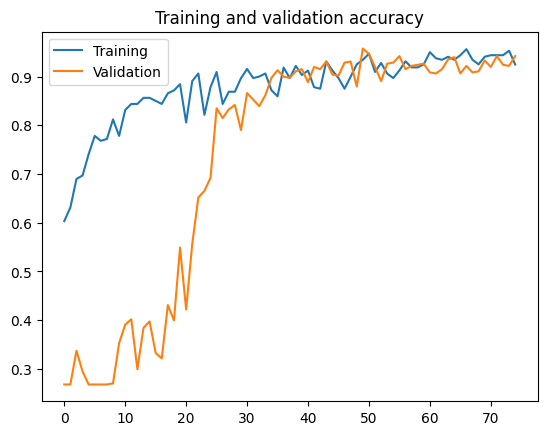

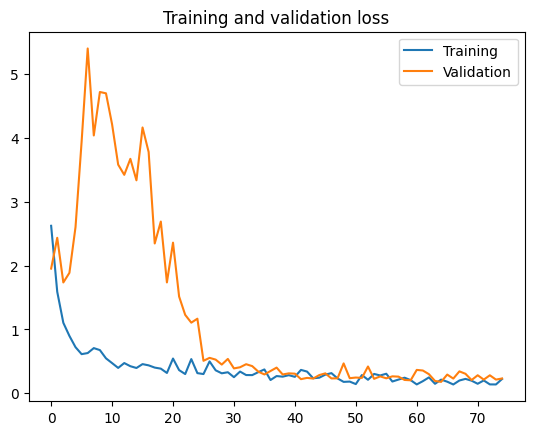

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss'   )

### Load best model weight

Here we save the best model in the checkpoint folder

In [ ]:
model.load_weights('/content/drive/MyDrive/Project ML/checkpoint')

### Evaluate model accuracy

In [ ]:
model.evaluate(validation_generator)

28/28 [==============================] - 7s 249ms/step - loss: 0.2351 - accuracy: 0.9576


[0.23506082594394684, 0.9575892686843872]

### Test prediction model

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  x /= 255.0
  prob = model.predict(x)
  classes = np.argmax(prob)

  if classes == 0:
    print("Bercak Coklat")
  elif classes == 1:
    print("Blast")
  elif classes == 2:
    print("hawar daun bakteri")
  else:
    print("tungro")

Saving BACTERAILBLIGHT3_004.jpg to BACTERAILBLIGHT3_004.jpg
1/1 [==============================] - 0s 335ms/step
hawar daun bakteri


### Save model

In [ ]:
saved_model_path = "/content/drive/MyDrive/Project ML/rice_4desease_9531.h5"

model.save(saved_model_path)